In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

In [2]:
def mean_shift(X_train, y_train):
    # Here we set the bandwidth. This function automatically derives a bandwidth
    # number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {}".format(n_clusters_))

    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,labels))

In [3]:
def spectral(X_train, y_train, n_clusters):
    # We know we're looking for three clusters.
    n_clusters=n_clusters

    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)

    #Predicted clusters.
    predict=sc.fit_predict(X_train)
    
    #Graph results.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))

In [4]:
def affinity(X_train, y_train):
    # Declare the model and fit it in one statement.
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation().fit(X_train)
    print('Done')

    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))
    
    plt.figure(1)
    plt.clf()
    
    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()

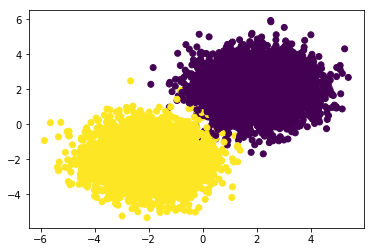

In [5]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

Number of estimated clusters: 2


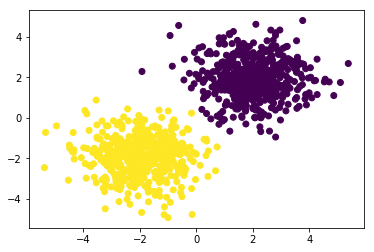

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        2  486


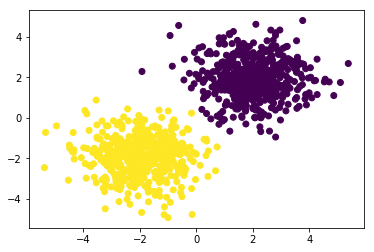

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        2  486
Done
Estimated number of clusters: 27


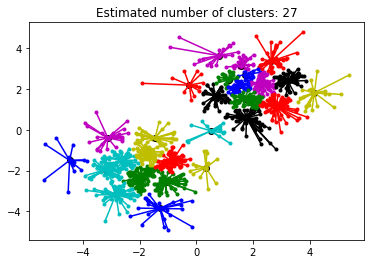

In [6]:
mean_shift(X_train, y_train)
spectral(X_train, y_train, 2)
affinity(X_train, y_train)

# Using 2 clusters

By reducing the number of clusters to 2 distinct clusters, 
1. kmeans is able to mostly identify which cluster each point belongs to,
2. mean-shift identifies 2 means, and pulls points closer to each
3. Spectral clustering actually functions the same as mean-shift
4. Affinity propagation still identifies every cluster through smaller subclusters that have more in common with each other

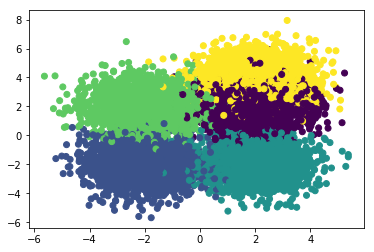

In [7]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2], [2, 4]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

Number of estimated clusters: 3


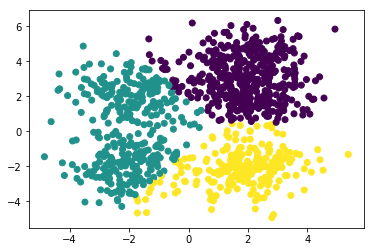

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      206    6    9
1        0  175   28
2        0    7  184
3       19  168    0
4      198    0    0


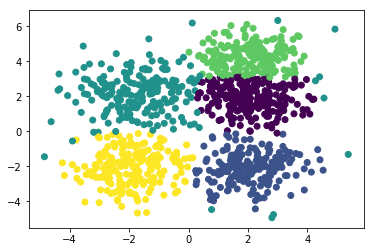

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0      182    1   15   23    0
1        0    4    9    0  190
2        2  176    5    0    8
3        4    0  179    1    3
4       31    0    9  158    0
Done
Estimated number of clusters: 50


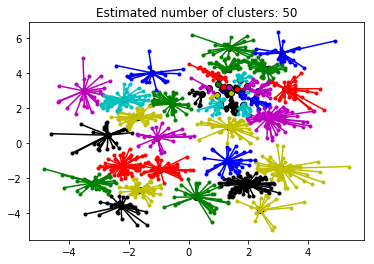

In [8]:
mean_shift(X_train, y_train)
spectral(X_train, y_train, 5)
affinity(X_train, y_train)

# Increasing to 5 clusters

By increasing the number of clusters to 5 distinct clusters, 
1. kmeans is able to mostly identify which cluster each point belongs to, although there is ambiguity between clusters
2. mean-shift actually believes that there are only 3 clusters
3. Spectral clustering identifies 5 clusters mostly correct, but it believes that one of the clusters also contains a circle around the other clusters
4. Affinity propagation still identifies every cluster through smaller subclusters that have more in common with each other, it does identify more similar points than with 3 clusters, though

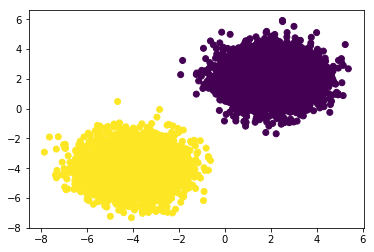

In [9]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-4, -4]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

Number of estimated clusters: 2


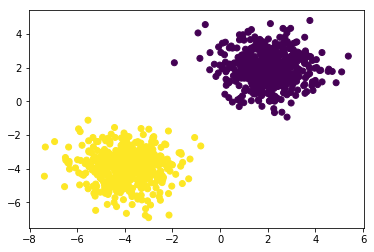

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        0  488


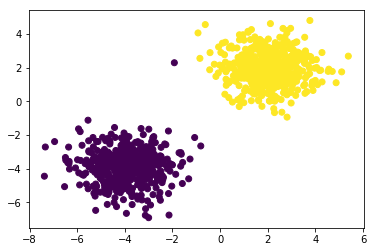

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        1  511
1      488    0


In [ ]:
mean_shift(X_train, y_train)
spectral(X_train, y_train, 2)
affinity(X_train, y_train)

# Using 2 clusters, further apart

By reducing the number of clusters to 2 distinct clusters and increasing the distance, 
1. kmeans actually puts the points closer to the centers than mean-shift does
2. mean-shift identifies 2 means easily, but not as well as kmeans
3. Spectral clustering behaves the same as mean-shift except for one point in the middle
4. Affinity propagation still identifies every cluster through smaller subclusters that have more in common with each other

In [ ]:
# The coordinates of the centers of our blobs.
centers = [[4, 4], [-4, -4], [4, -4], [-4, 4], [0, 10]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [ ]:
mean_shift(X_train, y_train)
spectral(X_train, y_train, 5)
affinity(X_train, y_train)

# Using 5 clusters, further apart

By increasing the number of clusters to 5 distinct clusters and increasing the distance, 
1. kmeans actually puts the points closer to the centers than mean-shift does
2. mean-shift identifies 5 means easily, but not as well as kmeans
3. Spectral clustering is once again, mostly correct, but believes that one of the clusters also circles each cluster, individually
4. Affinity propagation still identifies every cluster through smaller subclusters that have more in common with each other